# Classification: Logistic Regression

### Date: 2023-10-29
### Author: Emma Louise Blair (s214680)

In [15]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [16]:
# Load train and test data (x are attributes and y are true values)
x_train_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/independent_train.csv")
y_train_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/dependent_train.csv")
x_test_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/independent_test.csv")
y_test_df = pd.read_csv("C:/Users/s214680/OneDrive - Danmarks Tekniske Universitet/3. Semester/02450 Introduktion til machine learning og data mining/Project/project2_02450/2023-10-05_jennifer_data_preparation/dependent_test.csv")

In [17]:
# Flatten dependent variables (y) to 1D array
y_train = np.ravel(y_train_df)
y_test = np.ravel(y_test_df)

We introduce a cost matrix to give a higher wight to class 1 in hopes of reducing false negatives.

In [18]:
# Giving a higher weight to class 1 to reduce false negatives
class_weights = {0: 1, 1: 7}

We select Logistic Regression for the model. We then fit the model with the training data and predict y from the x test data. We have not introduced any regularization parameters yet.

In [19]:
# Creating model
model = lm.LogisticRegression(class_weight=class_weights)

# Fitting training data to logistic regression model
model.fit(x_train_df, y_train)

# Predict
y_pred = model.predict(x_test_df)

To test the Logistic Regression classification model's performance we use confusion matrix and accuracy score.

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f'Accuracy for Logistic Regression classification: {accuracy:.3f}')
print('Confusion Matrix: ')
print(conf_matrix)

Accuracy for Logistic Regression classification: 0.578
Confusion Matrix: 
[[20 24]
 [ 3 17]]


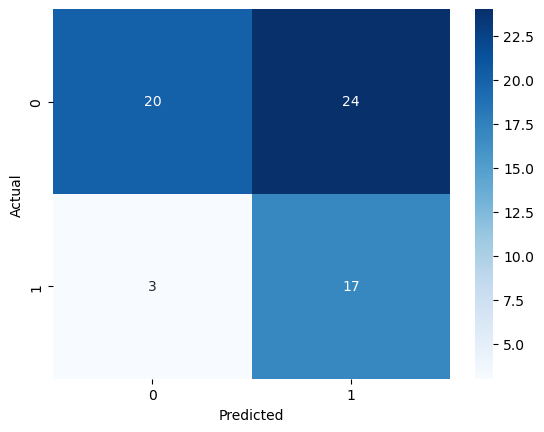

In [21]:
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

If we don't introduce a cost matrix we get the following heat map.

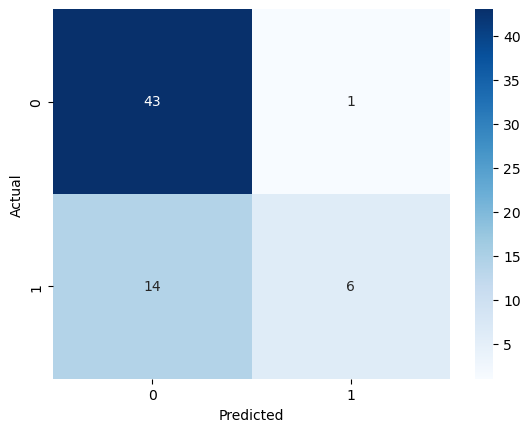

In [23]:
# Model withouth use of cost matrix
model2 = lm.LogisticRegression()
model2.fit(x_train_df, y_train)
y_pred2 = model2.predict(x_test_df)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix2, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()